In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Preprocessing

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=iris.feature_names)

kmeans = KMeans(n_clusters=3)

df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)
print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


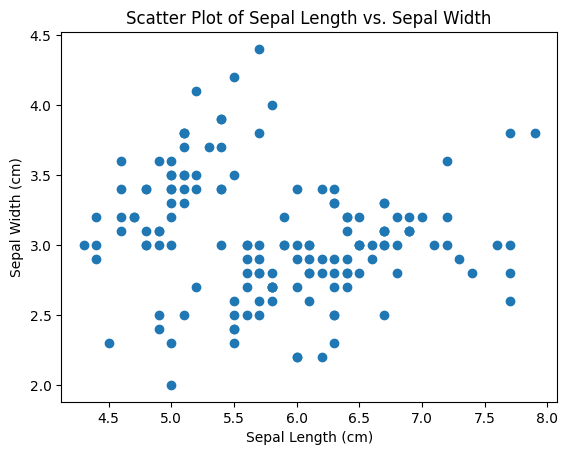

In [ ]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


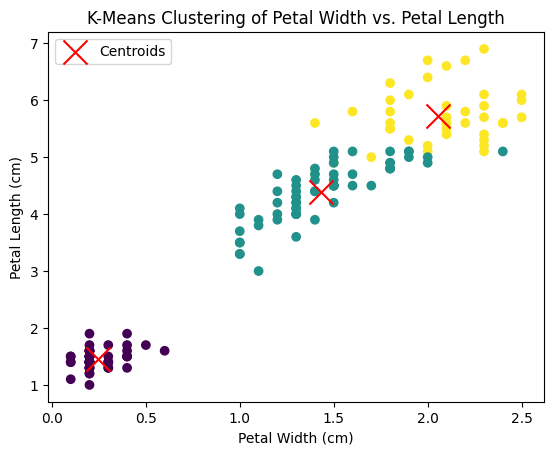

In [ ]:
kmeans = KMeans(n_clusters=3)

# Fit the K-Means model to the data and assign cluster labels
y_predicted = kmeans.fit_predict(df)
df['Cluster'] = y_predicted

#'petal width' on the x-axis and 'petal length' on the y-axis
plt.scatter(df['petal width (cm)'], df['petal length (cm)'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids', marker='x')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering of Petal Width vs. Petal Length')
plt.legend()
plt.show()

In [ ]:
sse = []
k_rng = range(1, 12)

for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)  # Using the scaled data with only 'petal length' and 'petal width'
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

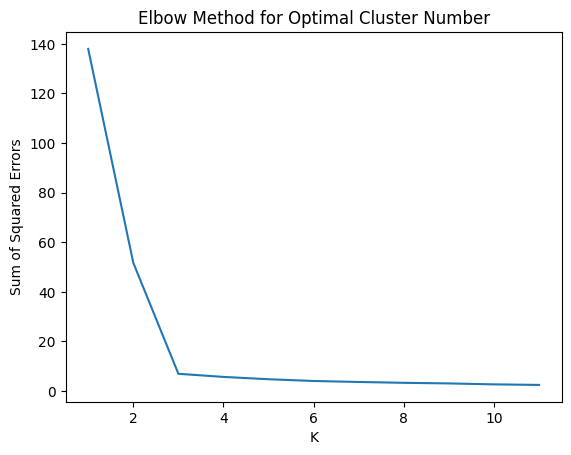

In [ ]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()